In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download()

In [3]:
# dat = pd.read_csv("data.csv",encoding= 'unicode_escape')
dat = pd.read_csv("data.csv",encoding="ISO-8859-1")

In [98]:
dat.head(5)
dff = dat.copy()
dat.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
duplicated = dff.duplicated().sum()
print(duplicated)
dff.drop_duplicates(inplace= True)

5268


In [6]:
dff.shape

(536641, 8)

In [7]:
#transfore the data type
dff['InvoiceDate']= pd.to_datetime(dff['InvoiceDate'])

In [8]:
dff.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
#deleting negative values from unit price and quantity
#we have negtive value for quantity and price
df = dff[(dff['Quantity']>0) & (dff['UnitPrice']>0)]

In [10]:
df.shape
df.describe()

,Quantity,UnitPrice,CustomerID
count,524878.000000,524878.000000,392692.000000
mean,10.616600,3.922573,15287.843865
std,156.280031,36.093028,1713.539549
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


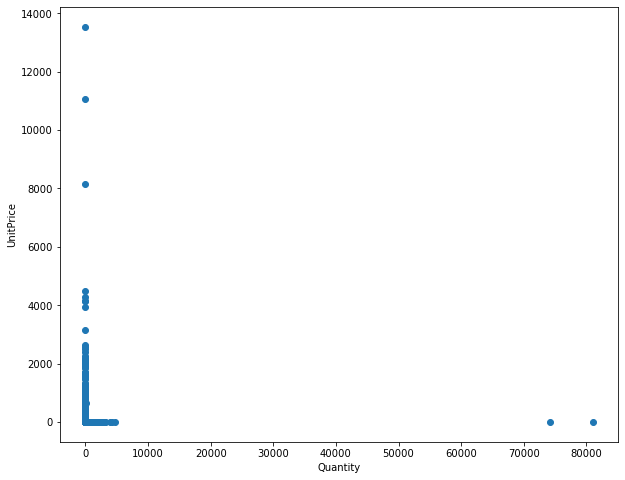

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Quantity'], df['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

### Relation of unit price with quantity

In [12]:
#Taking out outliers to get better plot
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['Quantity','UnitPrice']]))
df = df[(z < 3).all(axis=1)]

In [13]:
df = df[(df['Quantity']>=0) | (df['UnitPrice']>=0)]

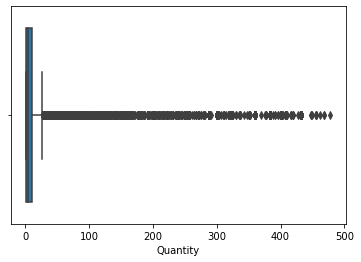

In [14]:
sns.boxplot(df['Quantity'])

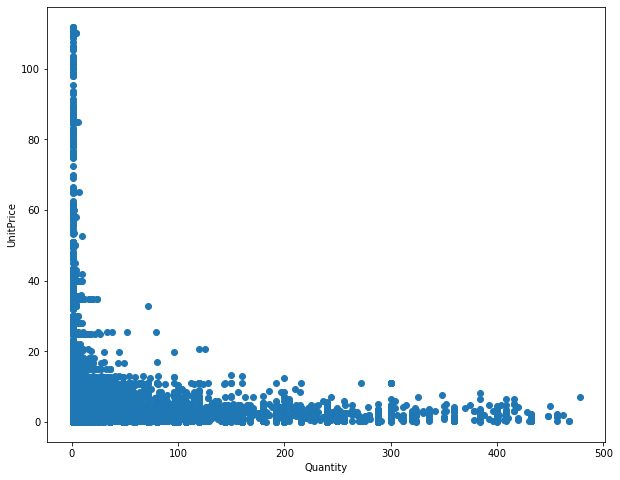

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['Quantity'], df['UnitPrice'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

In [16]:
#Checking the missings
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131581
Country             0
dtype: int64

In [17]:
#Creating total amount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']


In [18]:
df['Hour']=df['InvoiceDate'].dt.hour
df['Month']=df['InvoiceDate'].dt.month
df['Weekdays']= df['InvoiceDate'].dt.weekday

### RFM SEGMENTATION

In [19]:
rfm = df.copy()

In [20]:
#because we are looking at the customer and not the product we drop InvoiceNo and Stcokcode
ab = df.groupby('CustomerID').agg({'InvoiceDate': 'min','TotalAmount': 'sum'})
ab.rename(columns={'InvoiceDate': "Recency",('InvoiceDate', 'nunique'): "Frequency","TotalAmount": 'Monetization'},  inplace = True)
frequency = df.groupby('CustomerID').agg({'InvoiceDate':'nunique'})
frequency.rename(columns={'InvoiceDate': "Frequency"}, inplace = True)

rfm = pd.merge(ab,frequency, on='CustomerID')

#rfm.rename(columns={('InvoiceDate',     'min'): "Recency",('InvoiceDate', 'nunique'): "Frequency","TotalAmount": 'Monetization'})

In [21]:
a = rfm.reset_index()

In [22]:
rfm.rename(columns={'InvoiceDate': "Recency",'InvoiceDate': "Frequency","TotalAmount": 'Monetization'})

,Recency,Monetization,Frequency
CustomerID,,,
12347.0,2010-12-07 14:57:00,4310.00,7
12348.0,2010-12-16 19:09:00,1797.24,4
12349.0,2011-11-21 09:51:00,1457.55,1
12350.0,2011-02-02 16:01:00,334.40,1
12352.0,2011-02-16 12:33:00,1665.74,7
...,...,...,...
18280.0,2011-03-07 09:52:00,180.60,1
18281.0,2011-06-12 10:53:00,80.82,1
18282.0,2011-08-05 13:35:00,178.05,2


In [23]:
rfm.describe()

,Monetization,Frequency
count,4319.000000,4319.000000
mean,1862.908572,4.229683
std,7461.544419,7.570300
min,2.900000,1.000000
25%,301.950000,1.000000
50%,659.410000,2.000000
75%,1621.805000,5.000000
max,264629.060000,208.000000


In [24]:
#We save the most recent date to, then , calulate the recency
e = df['InvoiceDate'].min()
print('minimun :'+ str(e))

minimun :2010-12-01 08:26:00


In [25]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4319 entries, 12347.0 to 18287.0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Recency       4319 non-null   datetime64[ns]
 1   Monetization  4319 non-null   float64       
 2   Frequency     4319 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 135.0 KB


In [26]:
###create receny, cad calculate the last time he bought something compare to e
rfm['Recency'] = rfm['Recency'].apply(lambda x : (x - e).days)

rfm['BasketSize'] = (rfm['Monetization']/rfm['Frequency']).round(2)

In [27]:
rfm.describe()

,Recency,Monetization,Frequency
count,4319.000000,4319.000000,4319.000000
mean,150.464228,1862.908572,4.229683
std,117.856322,7461.544419,7.570300
min,0.000000,2.900000,1.000000
25%,47.000000,301.950000,1.000000
50%,125.000000,659.410000,2.000000
75%,261.000000,1621.805000,5.000000
max,373.000000,264629.060000,208.000000


In [257]:
rfm1 = rfm.copy()
# df.groupby('CustomerID')['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].min()
df

,0,1,2,3,4,5,6,7,8,9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711
5,0.570197,0.438602,0.988374,0.102045,0.208877,0.161310,0.653108,0.253292,0.466311,0.244426
6,0.158970,0.110375,0.656330,0.138183,0.196582,0.368725,0.820993,0.097101,0.837945,0.096098
7,0.976459,0.468651,0.976761,0.604846,0.739264,0.039188,0.282807,0.120197,0.296140,0.118728
8,0.317983,0.414263,0.064147,0.692472,0.566601,0.265389,0.523248,0.093941,0.575946,0.929296
9,0.318569,0.667410,0.131798,0.716327,0.289406,0.183191,0.586513,0.020108,0.828940,0.004695


In [28]:
#why do we rank it and how?
rfm['Rank_Recency'] = pd.qcut( rfm['Recency'],q=5, labels = range(6, 1, -1))
rfm['Rank_Recency'] = pd.to_numeric(rfm['Rank_Recency'])

In [29]:
def freq(x):
    if x ==1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else: 
        return 5

rfm['Rank_Frequency'] =rfm['Frequency'].apply(freq)

#rfm['Rank_Frequency'] = pd.qcut( rfm['Frequency'],q=5, labels = range(1, 6, 1))
#rfm['Rank_Frequency'] = pd.to_numeric(rfm['Rank_Frequency'])


In [30]:
rfm['Rank_Monetization'] = pd.qcut( rfm['Monetization'],q=5, labels = range(1, 6, 1))
rfm['Rank_Monetization'] = pd.to_numeric(rfm['Rank_Monetization'])

rfm['RFM_Score'] = rfm['Rank_Recency'].astype(str)+ rfm['Rank_Frequency'].astype(str) + rfm['Rank_Monetization'].astype(str)
rfm['Score'] = rfm['Rank_Recency']+ rfm['Rank_Frequency']+ rfm['Rank_Monetization']

rfm['BasketSize'] = (rfm['Monetization']/rfm['Frequency']).round(2)

In [31]:
rfm.describe()

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,Score
count,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000,4319.000000
mean,150.464228,1862.908572,4.229683,4.003473,2.715212,3.000000,9.718685
std,117.856322,7461.544419,7.570300,1.413636,1.616963,1.414541,3.749485
min,0.000000,2.900000,1.000000,2.000000,1.000000,1.000000,4.000000
25%,47.000000,301.950000,1.000000,3.000000,1.000000,2.000000,6.500000
50%,125.000000,659.410000,2.000000,4.000000,2.000000,3.000000,9.000000
75%,261.000000,1621.805000,5.000000,5.000000,5.000000,4.000000,13.000000
max,373.000000,264629.060000,208.000000,6.000000,5.000000,5.000000,16.000000


In [32]:
def client_segment(x):
    if x == 15:
        return 'Champions'
    elif  x >= 14:
        return 'Loyal Customers'
    elif  x >= 11:
        return 'Can’t Lose Them'
    elif  x >= 9:
        return 'Potential Loyalist'
    elif  x >= 7:
        return 'Promising'
    elif  x >= 6:
        return 'Needs Attention'
    elif  x >= 5:
        return 'At Risk'
    else:
        return 'Lost'

In [33]:
rfm['Clients'] = rfm['Score'].apply(client_segment)

In [34]:
clients = rfm[['Clients', 'Frequency', 'Monetization', 'Recency']].groupby('Clients').median()
clients.reset_index(inplace = True)

In [35]:
rfm.head(5)

,Recency,Monetization,Frequency,Rank_Recency,Rank_Frequency,Rank_Monetization,RFM_Score,Score,Clients
CustomerID,,,,,,,,,
12347.0,6,4310.00,7,6,5,5,655,16,Loyal Customers
12348.0,15,1797.24,4,6,4,4,644,14,Loyal Customers
12349.0,355,1457.55,1,2,1,4,214,7,Promising
12350.0,63,334.40,1,5,1,2,512,8,Promising
12352.0,77,1665.74,7,5,5,4,554,14,Loyal Customers


Text(0.5, 1.0, 'Median Visits')

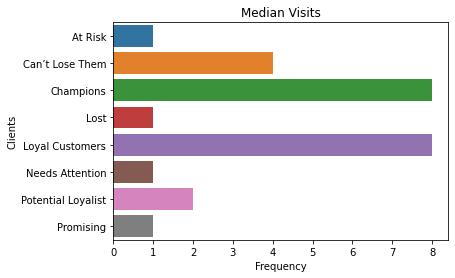

In [36]:
ax = sns.barplot(x="Frequency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Visits')

Text(0.5, 1.0, 'Median Expenditure')

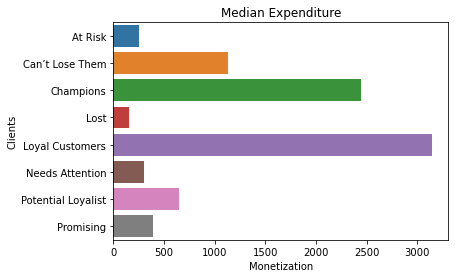

In [37]:
ax = sns.barplot(x="Monetization", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median Expenditure')

Text(0.5, 1.0, 'Median time from last shop ')

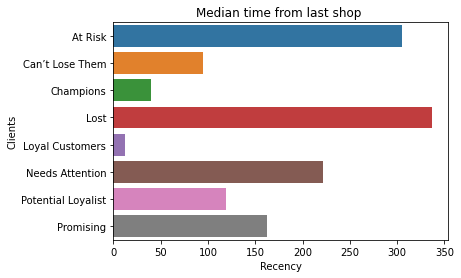

In [38]:
ax = sns.barplot(x="Recency", y="Clients", data=clients)
ax.set_ylabel('Clients')
ax.set_title('Median time from last shop ')


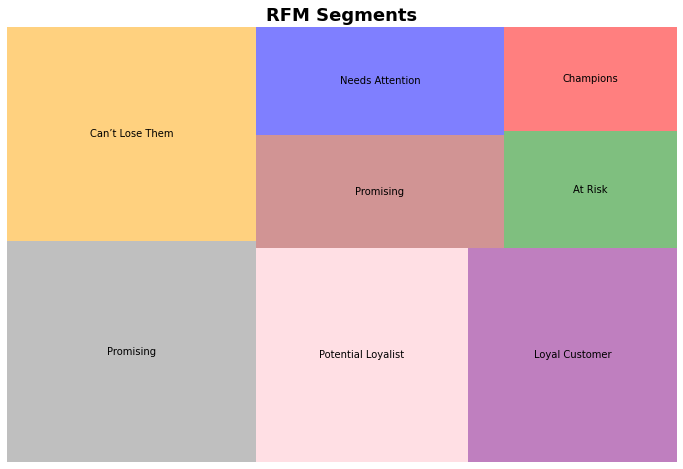

In [43]:
import squarify

squarity =rfm['Clients'] .value_counts()
color=['grey','orange','pink','purple', 'brown', 'blue', 'green', 'red']


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes= squarity , 
              label=['Promising',
                     'Can’t Lose Them',
                     'Potential Loyalist',
                     'Loyal Customer',
                     'Promising', 
                     'Needs Attention',
                     'At Risk',
                     'Champions',
                     'Lost',] ,color = color, alpha=0.5,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [44]:
squarity

Promising             814
Can’t Lose Them       789
Potential Loyalist    673
Loyal Customers       663
Needs Attention       416
At Risk               398
Champions             300
Lost                  266
Name: Clients, dtype: int64

Interpretation

We have a deeper understanding of our segmentations from the graphs above, from the median expenditure to each group's number. Among the visualization, we observe three horizontal histograms (median frequency, median monetization and median recency for every group of clients) and one squarity.

As we can see in the Median Expenditure graph, our two best categories of clients are champions (in green) and loyal customer(in purple). As we can see, both clients provide almost 80% of our revenue and only represent 22% of our total clients! This follows the 80/20 rule, also known as the Pareto Principle, attributed to the Italian economist Vilfredo Pareto. In one of his papers, Pareto noted that about 80% of Italy's land belonged to approximately 20% of its total population.

This is a presentation of the three different users:

Champions gather 300 customer who has a median expenditure of $2446 and comes almost every month. For marketers, they should be the most critical clients because they make your market sustainable. In this case, you must regularly reward with the promotion or provide to them privilege access.

Potential Loyalist represents 15% of our customers. They play an essential role in the growth of the market. They already show interest in the brand. The next step is to acquire them by building a relationship.

Customers that need attention constitutes 10% of our market. They spend and come below the average. We translated this with a potential loss, increased churn. It is vital to reactive interest with discounts and recommendations. Moreover, you may also receive feedback to improve your process.

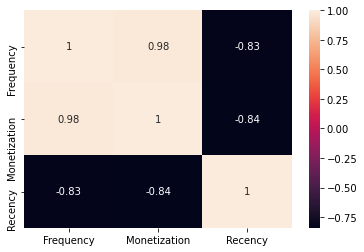

In [45]:
sns.heatmap(clients.corr(),annot=True)

In [46]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = clients.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Frequency,Monetization,Recency
Frequency,1.00,0.98,-0.83
Monetization,0.98,1.00,-0.84
Recency,-0.83,-0.84,1.00


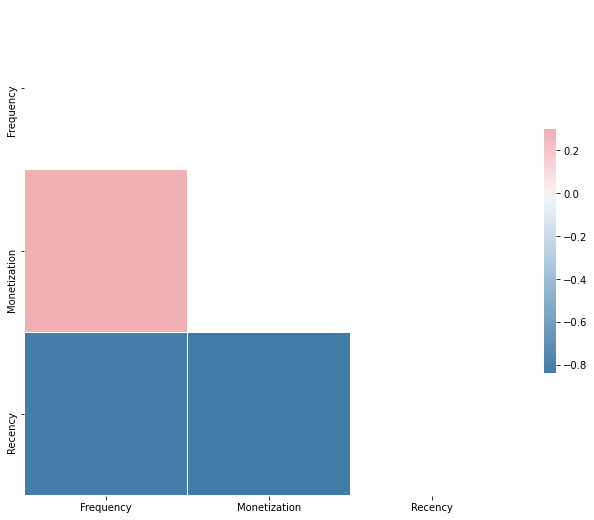

In [47]:
# Compute the correlation matrix
corr = clients.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

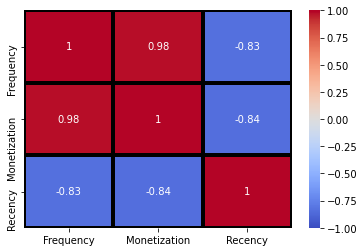

In [48]:
# sns.heatmap(clients.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
sns.heatmap(clients.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


In [49]:
clients

,Clients,Frequency,Monetization,Recency
0,At Risk,1.0,249.175,305.5
1,Can’t Lose Them,4.0,1132.030,95.0
2,Champions,8.0,2446.310,40.0
3,Lost,1.0,154.265,337.0
4,Loyal Customers,8.0,3144.860,12.0
5,Needs Attention,1.0,300.200,221.5
6,Potential Loyalist,2.0,650.430,119.0
7,Promising,1.0,387.780,162.5


In [50]:
rfm['Clients'].value_counts()

Promising             814
Can’t Lose Them       789
Potential Loyalist    673
Loyal Customers       663
Needs Attention       416
At Risk               398
Champions             300
Lost                  266
Name: Clients, dtype: int64

CLUSTER

Unsupervised is a type of machine learning that concludes from a data set without a target variable. We usually implement this method to find a hidden pattern or understand the structure of the data. It discovers information that may not be visible to the human eye. The most popular method is clustering.

Clustering split your data set into several groups. The group are formed of similar data point compared to the other group. We can use this approach for marketing segmentation, medical imaging, and anomaly detection. They are different types of clustering methods, including:
Partitioning methods
Hierarchical clustering
Fuzzy clustering
Density-based clustering
Model-based clustering
Analogy:

You had a box of apples of different colors; red, green, and mixed colors. Individually picking each color would not only consume time but is likely to entail manifestations of human error. However, with cluster analysis, we can segment these different apples according to color. With such information, one can harvest information such as how many apples belong to which color, which color is of the best quality, or which color has the least quality.

In [51]:
cluster = rfm.drop(['Rank_Recency','Rank_Frequency','Rank_Monetization','RFM_Score','Score','Clients'], axis = 1)

K-means clustering algorithm
K-means is one of the most straightforward clustering analysis to implement. It attempts to divide the dataset into a fixed number k of a group. The k refers to the number of centroids you want in your model. A centroid is a point at the center of each cluster. The algorithm then allocates every data point to the nearest cluster while keeping it as small as possible.

The appropriate number of clusters is essential for an optimal score. In marketing, a wrong evaluation of it can result in a poor marketing campaign. For example, If you have five kinds of customers, but you only allow them to be segmented into two groups. Your campaign will not target the right audience, which is translated into a low return on investment (ROI)

### Finding Optimal number of clusters

In [52]:
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [53]:
X= MinMaxScaler().fit_transform(cluster)
#x = StandardScaler().fit_transform(X)

In [54]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

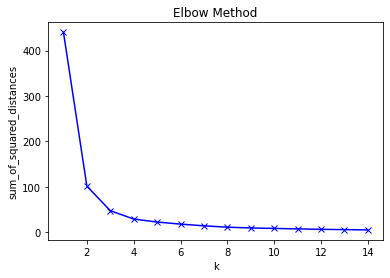

In [55]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

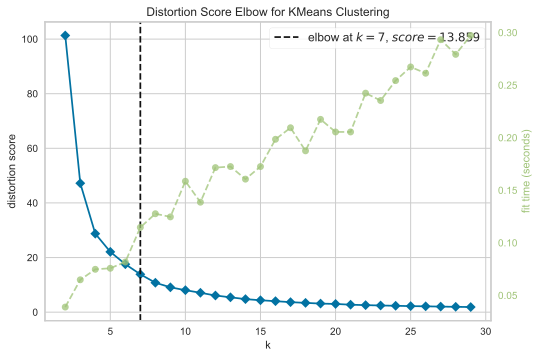

In [319]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

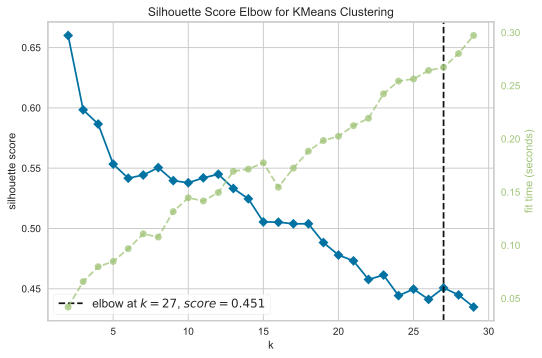

In [251]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

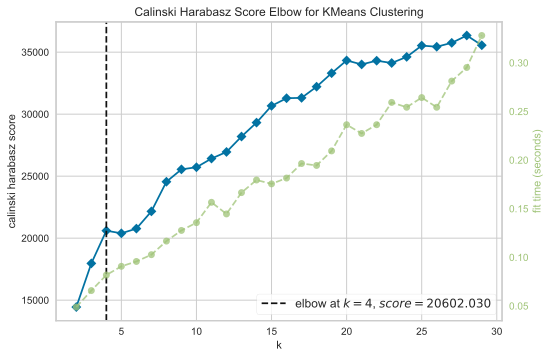

In [252]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [94]:
k_means_5 = KMeans(n_clusters=7)
model = k_means_5.fit(X)
y_hat_5 = k_means_5.predict(X)
labels_5 = k_means_5.labels_
print(metrics.silhouette_score(X, labels_5, metric = 'euclidean'))
metrics.calinski_harabasz_score(X, labels_5)

0.5470080458134396


22101.687620691166

In [95]:
cluster['Cluster'] = labels_5

In [119]:
temp

,CustomerID,Recency,Monetization,Frequency,Cluster
0,12347.0,6,4310.00,7,2
1,12348.0,15,1797.24,4,2
2,12349.0,355,1457.55,1,3
3,12350.0,63,334.40,1,1
4,12352.0,77,1665.74,7,1
...,...,...,...,...,...
4314,18280.0,96,180.60,1,6
4315,18281.0,193,80.82,1,5
4316,18282.0,247,178.05,2,0
4317,18283.0,36,2045.53,16,2


In [136]:
temp = cluster.reset_index()
print(temp.shape)
# temp.join(dff,on='CustomerID',how='right',lsuffix='left',rsuffix='right')
# pd.concat([dff,temp],join='inner',axis=1)
dff.columns
dff1 = dff.drop(columns=['InvoiceNo', 'StockCode','InvoiceDate'])
print(dff1.shape)
# dff1.join(temp,on='CustomerID',how='left',lsuffix='left',rsuffix='right')

(4319, 5)
(541909, 5)


In [130]:
dff1['CustomerID'] = dff1['CustomerID'].astype(str)
temp['CustomerID'] = temp['CustomerID'].astype(str)
print(dff1.dtypes)
print(temp.dtypes)

Description     object
Quantity         int64
UnitPrice      float64
CustomerID      object
Country         object
dtype: object
CustomerID       object
Recency           int64
Monetization    float64
Frequency         int64
Cluster           int32
dtype: object


### Building classification model to predict customer group

In [295]:
# temp.join(dff1,on='CustomerID',how='right',lsuffix='left',rsuffix='right')
temp1 = temp.merge(dff1,how='inner',left_on='CustomerID',right_on='CustomerID')
print(temp1.columns)
temp2 = temp1.drop(columns=['Recency', 'Monetization', 'Frequency'])

Index(['CustomerID', 'Recency', 'Monetization', 'Frequency', 'Cluster',
       'Description', 'Quantity', 'UnitPrice', 'Country'],
      dtype='object')


In [296]:
temp2
train = temp2.loc[:,temp2.columns != 'Cluster']
target = temp2.loc[:,temp2.columns == 'Cluster']
print(train.shape)
print(target.shape)

(406680, 5)
(406680, 1)


In [297]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['DescriptionCode'] = le.fit_transform(train['Description'])
train['CountryCode'] = le.fit_transform(train['Country'])
train
# train1 = train[['Description','Country']].apply(le.fit_transform)

,CustomerID,Description,Quantity,UnitPrice,Country,DescriptionCode,CountryCode
0,12347.0,BLACK CANDELABRA T-LIGHT HOLDER,12,2.10,Iceland,344,16
1,12347.0,AIRLINE BAG VINTAGE JET SET BROWN,4,4.25,Iceland,136,16
2,12347.0,COLOUR GLASS. STAR T-LIGHT HOLDER,12,3.25,Iceland,826,16
3,12347.0,MINI PAINT SET VINTAGE,36,0.65,Iceland,2057,16
4,12347.0,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,1.25,Iceland,810,16
...,...,...,...,...,...,...,...
406675,18287.0,LIPSTICK PEN RED,12,0.42,United Kingdom,1926,35
406676,18287.0,HAND WARMER SCOTTY DOG DESIGN,12,2.10,United Kingdom,1561,35
406677,18287.0,SET OF 3 WOODEN SLEIGH DECORATIONS,36,1.25,United Kingdom,3027,35
406678,18287.0,PAINTED METAL STAR WITH HOLLY BELLS,48,0.39,United Kingdom,2293,35


In [311]:
temptrain = train.drop(columns=['Description','CustomerID','Country'])

In [298]:
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train[['Quantity1','UnitPrice1']] = scaler.fit_transform(train[['Quantity','UnitPrice']])
# scaler.fit(train[['UnitPrice','Quantity']])
# scaled_data = pd.DataFrame(scaler.transform(train[['UnitPrice','Quantity']]),columns=['QuantScaled','UnitPriceScaled'])
train1 = pd.concat([train,scaled_data],axis=1)
train2 = train1.drop(columns=['Description','Quantity','UnitPrice','Country'])
train3 = train2.drop(columns=['CustomerID'])
train3

,DescriptionCode,CountryCode,QuantScaled,UnitPriceScaled
0,344,16,-0.019299,0.000359
1,136,16,0.011941,-0.043005
2,826,16,-0.002590,0.000359
3,2057,16,-0.040368,0.130450
4,810,16,-0.031650,0.000359
...,...,...,...,...
406675,1926,35,-0.043710,0.000359
406676,1561,35,-0.019299,0.000359
406677,3027,35,-0.031650,0.130450
406678,2293,35,-0.044145,0.195495


In [301]:
train3
# train4.drop( )

,DescriptionCode,CountryCode,QuantScaled,UnitPriceScaled
0,344,16,-0.019299,0.000359
1,136,16,0.011941,-0.043005
2,826,16,-0.002590,0.000359
3,2057,16,-0.040368,0.130450
4,810,16,-0.031650,0.000359
...,...,...,...,...
406675,1926,35,-0.043710,0.000359
406676,1561,35,-0.019299,0.000359
406677,3027,35,-0.031650,0.130450
406678,2293,35,-0.044145,0.195495


In [312]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temptrain,target,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(325344, 4)
(325344, 1)
(81336, 4)
(81336, 1)


In [313]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [326]:
prediction = clf.predict(X_train)

In [329]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_train,y_pred=prediction))

              precision    recall  f1-score   support

           0       0.75      0.32      0.45     24039
           1       0.53      0.30      0.38     58330
           2       0.47      0.85      0.60    114540
           3       0.45      0.30      0.36     29009
           4       0.72      0.58      0.64     29077
           5       0.64      0.20      0.30     25646
           6       0.48      0.24      0.32     44703

    accuracy                           0.50    325344
   macro avg       0.58      0.40      0.44    325344
weighted avg       0.54      0.50      0.47    325344



temp2
train = temp.loc[:,temp.columns != 'Cluster']
target = temp.loc[:,temp.columns == 'Cluster']
print(train.shape)
print(target.shape)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['DescriptionCode'] = le.fit_transform(train['Description'])
train['CountryCode'] = le.fit_transform(train['Country'])
train
# train1 = train[['Description','Country']].apply(le.fit_transform)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# train[['Quantity1','UnitPrice1']] = scaler.fit_transform(train[['Quantity','UnitPrice']])
scaler.fit(train[['UnitPrice','Quantity']])
scaled_data = pd.DataFrame(scaler.transform(train[['UnitPrice','Quantity']]),columns=['QuantScaled','UnitPriceScaled'])
train1 = pd.concat([train,scaled_data],axis=1)
train2 = train1.drop(columns=['Description','Quantity','UnitPrice','Country'])
train3 = train2.drop(columns=['CustomerID'])
train3

train4 = train.drop(columns=['Description','Country'])
train4

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train4,target,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

prediction = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=prediction))

In [322]:
import xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

[00:41:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [323]:
xgbpred = model.predict(X_train)

In [325]:
print(classification_report(y_pred=xgbpred,y_true=y_train))

              precision    recall  f1-score   support

           0       0.90      0.18      0.30     24039
           1       0.56      0.05      0.09     58330
           2       0.38      0.97      0.55    114540
           3       0.42      0.06      0.11     29009
           4       0.81      0.38      0.52     29077
           5       0.65      0.05      0.10     25646
           6       0.61      0.04      0.07     44703

    accuracy                           0.41    325344
   macro avg       0.62      0.25      0.25    325344
weighted avg       0.55      0.41      0.31    325344



In [99]:
table = cluster.groupby('Cluster').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetization': 'mean'})
table['Number of user'] = cluster['Cluster'].value_counts()
table

,Recency,Frequency,Monetization,Number of user
Cluster,,,,
0,258.731183,2.187097,887.302540,465
1,60.676075,4.440860,1715.965606,744
2,8.208854,7.858116,3181.495675,881
3,328.959350,1.559814,552.797574,861
4,4.650000,76.300000,79147.364500,20
5,182.363002,2.734729,924.099110,573
6,115.289032,3.339355,1245.568453,775


### Clustering by value

In [145]:
cluster1 = cluster.drop(columns=['Cluster'])
cluster1['BasketSize']  = cluster1['Monetization'] / cluster1['Frequency']
cluster1

,Recency,Monetization,Frequency,BasketSize
CustomerID,,,,
12347.0,6,4310.00,7,615.714286
12348.0,15,1797.24,4,449.310000
12349.0,355,1457.55,1,1457.550000
12350.0,63,334.40,1,334.400000
12352.0,77,1665.74,7,237.962857
...,...,...,...,...
18280.0,96,180.60,1,180.600000
18281.0,193,80.82,1,80.820000
18282.0,247,178.05,2,89.025000


In [146]:

clients1 = clients.copy()
clients1['BasketSize'] = clients1['Monetization'] / clients1['Frequency']
clients1

,Clients,Frequency,Monetization,Recency,BasketSize
0,At Risk,1.0,249.175,305.5,249.17500
1,Can’t Lose Them,4.0,1132.030,95.0,283.00750
2,Champions,8.0,2446.310,40.0,305.78875
3,Lost,1.0,154.265,337.0,154.26500
4,Loyal Customers,8.0,3144.860,12.0,393.10750
5,Needs Attention,1.0,300.200,221.5,300.20000
6,Potential Loyalist,2.0,650.430,119.0,325.21500
7,Promising,1.0,387.780,162.5,387.78000


Text(0.5, 1.0, 'Median BasketSize ')

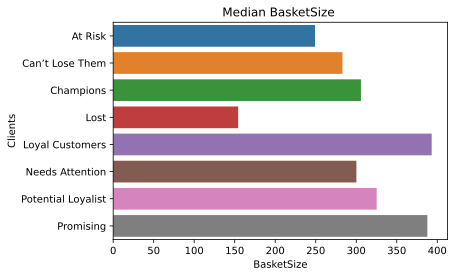

In [147]:
ax = sns.barplot(x="BasketSize", y="Clients", data=clients1)
ax.set_ylabel('Clients')
ax.set_title('Median BasketSize ')

### EDA

In [214]:
from datetime import timedelta
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from feature_engine.outlier_removers import Winsorizer

ModuleNotFoundError: No module named 'feature_engine.outlier_removers'

In [215]:
import feature_engine.outliers

In [216]:
import nltk, warnings
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [217]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from sklearn import metrics
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', 100)
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")

In [218]:
df_cleaned = dff.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

In [219]:
entry_to_remove = [] ; doubtfull_entry = []

In [220]:
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 10547


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,0


In [221]:
df_cleaned.drop(remaining_entries.index, axis = 0, inplace = True)

In [222]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0069',
       'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'S', 'PADS', 'DCGS0004',
       'B'], dtype=object)

In [223]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0069',
       'DCGSSBOY', 'DCGSSGIRL', 'gift_0001_10', 'S', 'PADS', 'DCGS0004',
       'B'], dtype=object)

In [224]:
df_cleaned[(df_cleaned['UnitPrice'] == 0)].head(5)
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])

In [225]:
uk_ecom = df_cleaned[df_cleaned['Country']=='United Kingdom']
uk_ecom['Description'] = uk_ecom['Description'].astype(str)
freq = pd.Series(' '.join(uk_ecom['Description']).split()).value_counts()[:20]
freq

SET          47546
OF           47348
BAG          47031
RED          37202
HEART        36555
VINTAGE      30617
RETROSPOT    30205
DESIGN       26725
PINK         26654
CHRISTMAS    23360
BOX          21442
METAL        19786
JUMBO        19661
WHITE        19434
CAKE         18602
BLUE         17463
3            16306
SIGN         16296
LUNCH        16209
HANGING      15907
dtype: int64

In [226]:
#Uncommon items
freq1 =  pd.Series(' '.join(uk_ecom['Description']).split()).value_counts()[-20:]
freq1

credited      1
17220         1
17107         1
mamage        1
see           1
Lighthouse    1
17104         1
SIL'T         1
*Boombox      1
Sale          1
on            1
WEEKEND       1
CAMPER        1
be            1
not           1
barcode       1
MEN           1
a             1
GLASSES       1
ICONS         1
dtype: int64

In [227]:
stop_words = set(stopwords.words("english"))
new_words = ['RED','PINK', 'BLUE', 'OF', 'BROWN',"BLACK"]
stop_words = stop_words.union(new_words)

In [228]:
for i in new_words:
  if i in stop_words:
    print(i)

RED
PINK
BLUE
OF
BROWN
BLACK


In [232]:
import re
import nltk.corpus
from nltk import corpus

In [237]:
corpus = []

In [245]:
for i in range(0, 8789):
    text = re.sub('[^a-zA-Z]', ' ', uk_ecom['Description'].iloc[i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    ps=PorterStemmer()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if word not in stop_words]
    text = " ".join(text)
    i
    corpus.append(text)

In [246]:
corpus

['set notebook parcel',
 'set notebook parcel',
 'white hanging heart light holder',
 'white metal lantern',
 'cream cupid heart coat hanger',
 'knitted union flag hot water bottle',
 'red woolly hottie white heart',
 'set babushka nesting box',
 'glass star frosted light holder',
 'hand warmer union jack',
 'hand warmer red polka dot',
 'assorted colour bird ornament',
 'poppy playhouse bedroom',
 'poppy playhouse kitchen',
 'feltcraft princess charlotte doll',
 'ivory knitted mug cosy',
 'box assorted colour teaspoon',
 'box vintage jigsaw block',
 'box vintage alphabet block',
 'home building block word',
 'love building block word',
 'recipe box metal heart',
 'doormat new england',
 'jam making set jar',
 'red coat rack paris fashion',
 'yellow coat rack paris fashion',
 'blue coat rack paris fashion',
 'bath building block word',
 'paper chain kit christmas',
 'hand warmer red polka dot',
 'hand warmer union jack',
 'white hanging heart light holder',
 'white metal lantern',
 'cr

In [247]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(    background_color='white',
                          stopwords=stop_words,
                          max_words=200,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))

Text(0.5, 1.0, "Word Cloud for Customer's Products")

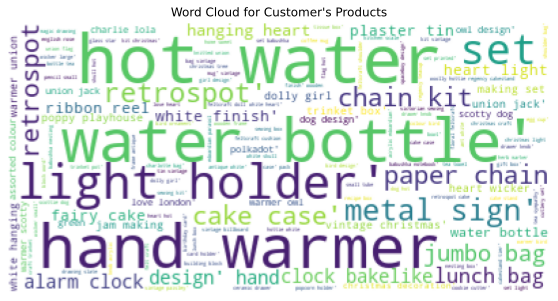

In [248]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Customer\'s Products')

### Cohort Analysis

In [82]:
import datetime as dt

In [78]:
def extract_days(x):
	return dt.datetime(x.year, x.month, x.day)

In [83]:
uk_ecom['date'] = pd.DatetimeIndex(uk_ecom['InvoiceDate']).date
uk_ecom['InvoiceDay'] = uk_ecom['date'].apply(extract_days)
grouping = uk_ecom.groupby('CustomerID')['InvoiceDay']
uk_ecom['CohortDay'] = grouping.transform('min')
print(uk_ecom.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   QuantityCanceled  TotalPrice        date InvoiceDay  CohortDay  
0                 0       15.30  2010-12-01 2010-12-01 2010-12-01  
1                 0       20.34  2010-12-01 20

In [84]:
def extract_month_int(x):
    return dt.datetime(x.year, x.month, 1)


In [85]:
#create invoice month column
uk_ecom['InvoiceMonth'] = uk_ecom['date'].apply(extract_month_int)
grouping = uk_ecom.groupby('CustomerID')['InvoiceMonth']
uk_ecom['CohortMonth'] = grouping.transform('min')
uk_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,date,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,2010-12-01,2010-12-01,2010-12-01,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12-01,2010-12-01,2010-12-01,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,2010-12-01,2010-12-01,2010-12-01,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12-01,2010-12-01,2010-12-01,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,2010-12-01,2010-12-01,2010-12-01,2010-12-01,2010-12-01


In [86]:
def extract_dates_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [87]:
invoice_year, invoice_month, _ = extract_dates_int(uk_ecom, 'InvoiceMonth')
cohort_year, cohort_month, _ = extract_dates_int(uk_ecom, 'CohortMonth')
years_difference = invoice_year - cohort_year
months_difference = invoice_month - cohort_month


In [88]:
uk_ecom['CohortIndex'] = years_difference * 12 + months_difference + 1
grouping = uk_ecom.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

In [89]:
cohort_counts = cohort_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'CustomerID')
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis = 0)

In [90]:
#review the retention table
retention.round(3) * 100
grouping_avg_quantity = uk_ecom.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_avg_quantity = grouping_avg_quantity['Quantity'].mean().reset_index()
average_quantity = cohort_data_avg_quantity.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'Quantity')
average_quantity.round(1).fillna('')

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.4,12.9,13.9,13.8,13.3,13.3,14.3,13.8,16.1,16.1,16.7,12.4,14.5
2011-01-01,18.1,9.6,9.4,15.1,10.1,10.9,13.6,10.8,10.8,8.7,8.6,10,
2011-02-01,11.0,14,15.9,12.1,12.3,11.9,13.9,13.7,11,12.5,13.8,,
2011-03-01,9.7,11.4,13.2,10.1,13.5,12.8,13.1,14.1,11.2,9.7,,,
2011-04-01,10.1,10.2,9.7,11.9,11.9,8.3,9.9,9.4,7.5,,,,
2011-05-01,10.7,9.4,14.8,12.8,11,8.3,10.8,126.9,,,,,
2011-06-01,9.5,14.8,12,12.7,9.8,8.9,9.4,,,,,,
2011-07-01,10.1,15,6.6,8.1,5.8,6.7,,,,,,,
2011-08-01,9.4,6,5,5.9,6.6,,,,,,,,


In [1]:
plt.figure(figsize = (10, 5))
plt.title('Retention Rate for Customers in United Kingdom')
sns.heatmap(data = retention, annot = True, fmt = '.0%', vmin = 0.01, vmax = 0.5, cmap = 'BuGn')
plt.show()

NameError: name 'plt' is not defined

## Assosiation Rules

In [331]:
data = dat.copy()

In [332]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
data_apriori = data[data['Country']=='United Kingdom']
data_apriori.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [333]:
# Which Product and Their Count 
data_apr = data_apriori.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
data_apr.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [334]:
def num(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_new = data_apr.applymap(num)
basket_new.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
from mlxtend.frequent_patterns import fpgrowth
rule_fp = fpgrowth(basket_new, min_support=0.02, use_colnames=True)
rule_fp

,support,itemsets
0,0.098276,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.020327,(KNITTED UNION FLAG HOT WATER BOTTLE)
2,0.021597,(HAND WARMER UNION JACK)
3,0.062205,(ASSORTED COLOUR BIRD ORNAMENT)
4,0.033938,(HOME BUILDING BLOCK WORD)
...,...,...
237,0.020145,"(LUNCH BAG CARS BLUE, LUNCH BAG SUKI DESIGN )"
238,0.022641,"(LUNCH BAG SUKI DESIGN , LUNCH BAG BLACK SKULL.)"
239,0.023049,"(JUMBO BAG RED RETROSPOT, JUMBO BAG APPLES)"
240,0.020508,"(PARTY BUNTING, SPOTTY BUNTING)"


In [336]:
items = apriori(basket_new, min_support=0.02, use_colnames=True)
items

,support,itemsets
0,0.038793,(6 RIBBONS RUSTIC CHARM)
1,0.026361,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.034165,(60 TEATIME FAIRY CAKE CASES)
3,0.025181,(72 SWEETHEART FAIRY CAKE CASES)
4,0.039746,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
237,0.021234,"(WHITE HANGING HEART T-LIGHT HOLDER, RED HANGI..."
238,0.020780,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL..."
239,0.020599,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU..."
240,0.023956,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."


In [341]:
# pd.set_option('display.height', 100)
# pd.set_option('display.max_rows', 100)
pd.options.display.max_rows

100

In [342]:
rule = association_rules(items, metric="lift", min_threshold=1)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.042196,0.039746,0.025544,0.605376,15.231158,0.023867,2.433341
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.039746,0.042196,0.025544,0.642694,15.231158,0.023867,2.680627
2,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.030581,0.041062,0.021733,0.710682,17.307671,0.020478,3.314484
3,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.041062,0.030581,0.021733,0.529282,17.307671,0.020478,2.059447
4,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG SUKI DESIGN),0.041062,0.036479,0.021552,0.524862,14.388005,0.020054,2.027875
5,(CHARLOTTE BAG SUKI DESIGN),(RED RETROSPOT CHARLOTTE BAG),0.036479,0.041062,0.021552,0.590796,14.388005,0.020054,2.343424
6,(JUMBO BAG RED RETROSPOT),(DOTCOM POSTAGE),0.087931,0.032123,0.022005,0.250258,7.790517,0.019181,1.290946
7,(DOTCOM POSTAGE),(JUMBO BAG RED RETROSPOT),0.032123,0.087931,0.022005,0.685028,7.790517,0.019181,2.895717
8,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034029,0.040744,0.024546,0.721333,17.703994,0.023160,3.442306
9,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.040744,0.034029,0.024546,0.602450,17.703994,0.023160,2.429809


In [349]:
association_rules(items, metric="lift", min_threshold=1).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.042196,0.039746,0.025544,0.605376,15.231158,0.023867,2.433341
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.039746,0.042196,0.025544,0.642694,15.231158,0.023867,2.680627
2,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.030581,0.041062,0.021733,0.710682,17.307671,0.020478,3.314484
3,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG PINK POLKADOT),0.041062,0.030581,0.021733,0.529282,17.307671,0.020478,2.059447
4,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG SUKI DESIGN),0.041062,0.036479,0.021552,0.524862,14.388005,0.020054,2.027875
5,(CHARLOTTE BAG SUKI DESIGN),(RED RETROSPOT CHARLOTTE BAG),0.036479,0.041062,0.021552,0.590796,14.388005,0.020054,2.343424
6,(JUMBO BAG RED RETROSPOT),(DOTCOM POSTAGE),0.087931,0.032123,0.022005,0.250258,7.790517,0.019181,1.290946
7,(DOTCOM POSTAGE),(JUMBO BAG RED RETROSPOT),0.032123,0.087931,0.022005,0.685028,7.790517,0.019181,2.895717
8,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034029,0.040744,0.024546,0.721333,17.703994,0.023160,3.442306
9,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.040744,0.034029,0.024546,0.602450,17.703994,0.023160,2.429809
